# Text Generation

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [5]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [8]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [11]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Train on 453 samples
Epoch 1/500
453/453 [==============================] - 6s 13ms/sample - loss: 5.5671 - accuracy: 0.0221
Epoch 2/500
453/453 [==============================] - 0s 478us/sample - loss: 5.5390 - accuracy: 0.0508
Epoch 3/500
453/453 [==============================] - 0s 478us/sample - loss: 5.4599 - accuracy: 0.0508
Epoch 4/500
453/453 [==============================] - 0s 501us/sample - loss: 5.2514 - accuracy: 0.0508
Epoch 5/500
453/453 [==============================] - 0s 525us/sample - loss: 5.1088 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 0s 526us/sample - loss: 5.0621 - accuracy: 0.0508
Epoch 7/500
453/453 [==============================] - 0s 561us/sample - loss: 5.0268 - accuracy: 0.0375
Epoch 8/500
453/453 [==============================] - 0s 535us/sample - loss: 4.9982 - accuracy: 0.0486
Epoch 9/500
453/453 [==============================] - 0s 566us/sample - loss: 4.9654 - accuracy: 0.0486
Epoch 10/500
453/453 [=============

453/453 [==============================] - 0s 470us/sample - loss: 2.5649 - accuracy: 0.4967
Epoch 78/500
453/453 [==============================] - 0s 454us/sample - loss: 2.5204 - accuracy: 0.4879
Epoch 79/500
453/453 [==============================] - 0s 413us/sample - loss: 2.4863 - accuracy: 0.5077
Epoch 80/500
453/453 [==============================] - 0s 501us/sample - loss: 2.4631 - accuracy: 0.5364
Epoch 81/500
453/453 [==============================] - 0s 459us/sample - loss: 2.4333 - accuracy: 0.5364
Epoch 82/500
453/453 [==============================] - 0s 460us/sample - loss: 2.4056 - accuracy: 0.5298
Epoch 83/500
453/453 [==============================] - 0s 478us/sample - loss: 2.3760 - accuracy: 0.5541
Epoch 84/500
453/453 [==============================] - 0s 462us/sample - loss: 2.3549 - accuracy: 0.5629
Epoch 85/500
453/453 [==============================] - 0s 460us/sample - loss: 2.3264 - accuracy: 0.5828
Epoch 86/500
453/453 [==============================] - 0s 

453/453 [==============================] - 0s 469us/sample - loss: 1.1339 - accuracy: 0.8344
Epoch 154/500
453/453 [==============================] - 0s 465us/sample - loss: 1.1184 - accuracy: 0.8366
Epoch 155/500
453/453 [==============================] - 0s 460us/sample - loss: 1.1037 - accuracy: 0.8344
Epoch 156/500
453/453 [==============================] - 0s 466us/sample - loss: 1.0921 - accuracy: 0.8477
Epoch 157/500
453/453 [==============================] - 0s 456us/sample - loss: 1.0779 - accuracy: 0.8433
Epoch 158/500
453/453 [==============================] - 0s 455us/sample - loss: 1.0659 - accuracy: 0.8455
Epoch 159/500
453/453 [==============================] - 0s 462us/sample - loss: 1.0525 - accuracy: 0.8477
Epoch 160/500
453/453 [==============================] - 0s 451us/sample - loss: 1.0413 - accuracy: 0.8499
Epoch 161/500
453/453 [==============================] - 0s 462us/sample - loss: 1.0317 - accuracy: 0.8477
Epoch 162/500
453/453 [============================

453/453 [==============================] - 0s 544us/sample - loss: 0.5213 - accuracy: 0.9183
Epoch 230/500
453/453 [==============================] - 0s 515us/sample - loss: 0.5180 - accuracy: 0.9183
Epoch 231/500
453/453 [==============================] - 0s 522us/sample - loss: 0.5125 - accuracy: 0.9183
Epoch 232/500
453/453 [==============================] - 0s 588us/sample - loss: 0.5074 - accuracy: 0.9249
Epoch 233/500
453/453 [==============================] - 0s 521us/sample - loss: 0.5012 - accuracy: 0.9294
Epoch 234/500
453/453 [==============================] - 0s 568us/sample - loss: 0.4953 - accuracy: 0.9249
Epoch 235/500
453/453 [==============================] - 0s 517us/sample - loss: 0.4906 - accuracy: 0.9249
Epoch 236/500
453/453 [==============================] - 0s 485us/sample - loss: 0.4858 - accuracy: 0.9272
Epoch 237/500
453/453 [==============================] - 0s 498us/sample - loss: 0.4812 - accuracy: 0.9294
Epoch 238/500
453/453 [============================

453/453 [==============================] - 0s 498us/sample - loss: 0.2824 - accuracy: 0.9448
Epoch 306/500
453/453 [==============================] - 0s 702us/sample - loss: 0.2804 - accuracy: 0.9470
Epoch 307/500
453/453 [==============================] - 0s 531us/sample - loss: 0.2792 - accuracy: 0.9470
Epoch 308/500
453/453 [==============================] - 0s 517us/sample - loss: 0.2770 - accuracy: 0.9426
Epoch 309/500
453/453 [==============================] - 0s 531us/sample - loss: 0.2757 - accuracy: 0.9470
Epoch 310/500
453/453 [==============================] - 0s 605us/sample - loss: 0.2729 - accuracy: 0.9514
Epoch 311/500
453/453 [==============================] - 0s 487us/sample - loss: 0.2708 - accuracy: 0.9492
Epoch 312/500
453/453 [==============================] - 0s 471us/sample - loss: 0.2687 - accuracy: 0.9492
Epoch 313/500
453/453 [==============================] - 0s 505us/sample - loss: 0.2666 - accuracy: 0.9492
Epoch 314/500
453/453 [============================

453/453 [==============================] - 0s 473us/sample - loss: 0.1842 - accuracy: 0.9536
Epoch 382/500
453/453 [==============================] - 0s 469us/sample - loss: 0.1829 - accuracy: 0.9536
Epoch 383/500
453/453 [==============================] - 0s 456us/sample - loss: 0.1826 - accuracy: 0.9536
Epoch 384/500
453/453 [==============================] - 0s 471us/sample - loss: 0.1819 - accuracy: 0.9536
Epoch 385/500
453/453 [==============================] - 0s 456us/sample - loss: 0.1820 - accuracy: 0.9514
Epoch 386/500
453/453 [==============================] - 0s 473us/sample - loss: 0.1810 - accuracy: 0.9514
Epoch 387/500
453/453 [==============================] - 0s 467us/sample - loss: 0.1800 - accuracy: 0.9492
Epoch 388/500
453/453 [==============================] - 0s 441us/sample - loss: 0.1792 - accuracy: 0.9514
Epoch 389/500
453/453 [==============================] - 0s 473us/sample - loss: 0.1799 - accuracy: 0.9514
Epoch 390/500
453/453 [============================

453/453 [==============================] - 0s 496us/sample - loss: 0.1384 - accuracy: 0.9470
Epoch 458/500
453/453 [==============================] - 0s 462us/sample - loss: 0.1383 - accuracy: 0.9492
Epoch 459/500
453/453 [==============================] - 0s 484us/sample - loss: 0.1378 - accuracy: 0.9448
Epoch 460/500
453/453 [==============================] - 0s 522us/sample - loss: 0.1375 - accuracy: 0.9470
Epoch 461/500
453/453 [==============================] - 0s 513us/sample - loss: 0.1366 - accuracy: 0.9470
Epoch 462/500
453/453 [==============================] - 0s 470us/sample - loss: 0.1363 - accuracy: 0.9492
Epoch 463/500
453/453 [==============================] - 0s 478us/sample - loss: 0.1353 - accuracy: 0.9492
Epoch 464/500
453/453 [==============================] - 0s 509us/sample - loss: 0.1363 - accuracy: 0.9448
Epoch 465/500
453/453 [==============================] - 0s 541us/sample - loss: 0.1364 - accuracy: 0.9492
Epoch 466/500
453/453 [============================

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

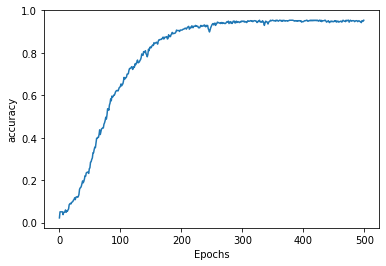

In [14]:
plot_graphs(history, 'accuracy')

In [15]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin they as athy catchers water doing water at for at for for at lanigans ball ball ball ball entangled ball suppose ball doing at for at for for lanigans ball ball ball ball ball entangled ball suppose ball doing at for at for for lanigans ball ball ball ball ball entangled ball suppose ball doing at for at for for lanigans ball ball ball ball ball entangled ball suppose ball doing at for at for for lanigans ball ball ball ball ball entangled ball suppose ball doing at for at for for lanigans ball ball ball ball ball entangled ball


In [19]:
seed_text = "Laurence went to dublin"

tokenizer.texts_to_sequences([seed_text])

[[134, 13, 59]]